In [232]:
import h5py
import datetime
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [233]:
data = h5py.File('goes15_recal.h5','r')

In [234]:
var_names = ([f'f{i}_18' for i in range(5)] + [f't{i}_18' for i in range(5)] + [f'a{i}_18' for i in range(5)] +
             [f'dfdt{i}_18' for i in range(5)] + [f'f{i}_054' for i in range(5)] + [f't{i}_054' for i in range(5)] +
             [f'a{i}_054' for i in range(5)] + [f'dfdt{i}_054' for i in range(5)] +
             ['ptd', 'temperature', 'em', 'start_time', 'end_time', 'fwhm18', 'decay18', 't_s18', 't_e18',
              'fwhm054', 'decay054', 't_s054', 't_e054',])
with h5py.File('goes15_recal.h5','r') as hf:
    data = {v: hf[v][:].squeeze() for v in var_names}

In [235]:
data.keys()

dict_keys(['f0_18', 'f1_18', 'f2_18', 'f3_18', 'f4_18', 't0_18', 't1_18', 't2_18', 't3_18', 't4_18', 'a0_18', 'a1_18', 'a2_18', 'a3_18', 'a4_18', 'dfdt0_18', 'dfdt1_18', 'dfdt2_18', 'dfdt3_18', 'dfdt4_18', 'f0_054', 'f1_054', 'f2_054', 'f3_054', 'f4_054', 't0_054', 't1_054', 't2_054', 't3_054', 't4_054', 'a0_054', 'a1_054', 'a2_054', 'a3_054', 'a4_054', 'dfdt0_054', 'dfdt1_054', 'dfdt2_054', 'dfdt3_054', 'dfdt4_054', 'ptd', 'temperature', 'em', 'start_time', 'end_time', 'fwhm18', 'decay18', 't_s18', 't_e18', 'fwhm054', 'decay054', 't_s054', 't_e054'])

In [236]:
data["start_time"] = data["start_time"].astype(str)
data["end_time"] = data["end_time"].astype(str)

data = pd.DataFrame(data)
flare_times = [datetime.datetime.strptime(d, "%d-%b-%y %H:%M:%S.%f") for d in data["start_time"].astype(str)]
data["start_time_datetime"] = flare_times
data["matchtime"] = data["start_time_datetime"]#data.start_time_datetime.dt.strftime("%Y-%m-%d %H:%M")


In [237]:
data["matchtime"]

0      2010-09-04 06:50:00
1      2010-09-04 15:45:00
2      2010-09-04 21:54:00
3      2010-09-05 01:09:00
4      2010-09-05 02:01:00
               ...        
7050   2019-07-06 05:58:00
7051   2019-07-06 21:07:00
7052   2019-12-13 08:10:00
7053   2019-12-20 10:44:00
7054   2020-01-24 19:37:00
Name: matchtime, Length: 7055, dtype: datetime64[ns]

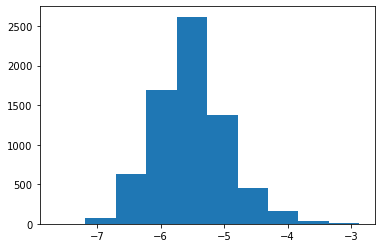

In [238]:
_ = plt.hist(np.log10(data["f2_18"]))


`f2_18` is the peak flux value

In [239]:
data["f2_18"]

0       6.976200e-07
1       4.694000e-07
2       3.487300e-07
3       4.090600e-07
4       4.090600e-07
            ...     
7050    2.720818e-08
7051    4.675466e-07
7052    2.167161e-08
7053    3.147818e-08
7054    1.024978e-07
Name: f2_18, Length: 7055, dtype: float32

In [240]:
"C"+str(round(data["f2_18"][2]/1e-7, 1))

'C3.5'

In [241]:
def map_values(x):
    if x>=1e-4:
        return "X"+str(round(x/1e-4, 1))
    elif x<1e-4 and x>=1e-5:
        return "M"+str(round(x/1e-5, 1))        
    elif x<1e-5 and x>=1e-6:
        return "C"+str(round(x/1e-6, 1))        
    elif x<1e-6 and x>=1e-7:
        return "B"+str(round(x/1e-7, 1))        
    elif x<1e-7 and x>=1e-8:
        return "A"+str(round(x/1e-8, 1))
    else:
        print("issue")
        
        
    

In [242]:
data["goes_class"] = data["f2_18"].map(map_values)
data["goes_class_ind"] = [x[0] for x in data.goes_class]

In [243]:
data["goes_class_ind"].value_counts()

C    4602
B    1315
M    1053
X      78
A       7
Name: goes_class_ind, dtype: int64

In [244]:
data["start_time_datetime"].min()

Timestamp('2010-09-04 06:50:00')

In [245]:
data_x = data[data["goes_class_ind"].isin(["X"])]

In [246]:
data_x[["f2_18", "goes_class"]]

,f2_18,goes_class
370,0.000232,X2.3
495,0.000158,X1.6
921,0.000739,X7.4
922,0.000739,X7.4
1003,0.000216,X2.2
...,...,...
6757,0.000145,X1.5
6758,0.000201,X2.0
6768,0.000118,X1.2
6769,0.000118,X1.2


In [247]:
np.argmax(data_x["f2_18"])

70

In [248]:
data_x.iloc[70]

f0_18                                0.000009
f1_18                                0.000488
f2_18                                0.001351
f3_18                                0.001202
f4_18                                0.000239
t0_18                                  673.78
t1_18                                 858.096
t2_18                                 1150.95
t3_18                                1255.396
t4_18                                2330.576
a0_18                                     0.0
a1_18                                0.011617
a2_18                                 0.15738
a3_18                                0.224497
a4_18                                0.524813
dfdt0_18                                  0.0
dfdt1_18                             0.000007
dfdt2_18                                 -0.0
dfdt3_18                            -0.000002
dfdt4_18                                 -0.0
f0_054                               0.000001
f1_054                            

Jeff obviously used the new GOES files...

# Lets now merge flare lists

In [250]:
flare_list = pd.read_csv("/Users/laurahayes/ml_project_flares/flare_analysis/goes_flare_list/final_flare_list.csv")
flare_list["event_starttime"] = pd.to_datetime(flare_list["event_starttime"])
flare_list["tt"] = [x.total_seconds() for x in flare_list.event_starttime - flare_list.event_starttime[0]]

# for flares in which cross midnight to next day
flare_list.loc[(pd.to_datetime(flare_list.event_endtime)<flare_list.event_starttime),'event_endtime']=pd.to_datetime(flare_list["event_endtime"]) + datetime.timedelta(days=1)
flare_list.loc[(pd.to_datetime(flare_list.event_peaktime)<flare_list.event_starttime),'event_peaktime']=pd.to_datetime(flare_list["event_peaktime"]) + datetime.timedelta(days=1)

# drop duplicate records
flare_list = flare_list.drop_duplicates(subset="event_peaktime")

#tidy up AR numbers
flare_list["noaa_ar"] = flare_list["noaa_ar"].replace(["\n","", "     "], 0)
flare_list["noaa_ar"] = flare_list["noaa_ar"].astype(int)

# add column to match with AR data
flare_list["matchtime"] = flare_list["event_starttime"]#.dt.strftime("%Y-%m-%d %H:%M")

# fix integrated flux
flare_list["integrated_flux"] = flare_list["integrated_flux"].replace(['',"", "       "], 0).astype(float)

In [251]:
flare_list["matchtime"]

0      2010-01-02 07:09:00
1      2010-01-02 14:08:00
2      2010-01-02 22:57:00
3      2010-01-03 01:17:00
4      2010-01-04 03:36:00
               ...        
8601   2018-05-23 18:03:00
8602   2018-05-28 17:04:00
8603   2018-06-06 10:44:00
8604   2018-06-21 01:09:00
8605   2018-07-06 19:41:00
Name: matchtime, Length: 8597, dtype: datetime64[ns]

In [252]:
data["matchtime"]

0      2010-09-04 06:50:00
1      2010-09-04 15:45:00
2      2010-09-04 21:54:00
3      2010-09-05 01:09:00
4      2010-09-05 02:01:00
               ...        
7050   2019-07-06 05:58:00
7051   2019-07-06 21:07:00
7052   2019-12-13 08:10:00
7053   2019-12-20 10:44:00
7054   2020-01-24 19:37:00
Name: matchtime, Length: 7055, dtype: datetime64[ns]

In [254]:
flare_list = flare_list.set_index(pd.to_datetime(flare_list["event_starttime"]))
flare_list.sort_index(inplace=True)

In [255]:
data.keys()

Index(['f0_18', 'f1_18', 'f2_18', 'f3_18', 'f4_18', 't0_18', 't1_18', 't2_18',
       't3_18', 't4_18', 'a0_18', 'a1_18', 'a2_18', 'a3_18', 'a4_18',
       'dfdt0_18', 'dfdt1_18', 'dfdt2_18', 'dfdt3_18', 'dfdt4_18', 'f0_054',
       'f1_054', 'f2_054', 'f3_054', 'f4_054', 't0_054', 't1_054', 't2_054',
       't3_054', 't4_054', 'a0_054', 'a1_054', 'a2_054', 'a3_054', 'a4_054',
       'dfdt0_054', 'dfdt1_054', 'dfdt2_054', 'dfdt3_054', 'dfdt4_054', 'ptd',
       'temperature', 'em', 'start_time', 'end_time', 'fwhm18', 'decay18',
       't_s18', 't_e18', 'fwhm054', 'decay054', 't_s054', 't_e054',
       'start_time_datetime', 'matchtime', 'goes_class', 'goes_class_ind'],
      dtype='object')

In [256]:
cols = ["decay18", "decay054", "fwhm18", "fwhm054", "temperature", "em", "start_time_datetime", "matchtime"]
data2 = data[cols]

In [257]:
data2 = data2.set_index("start_time_datetime")
data2.sort_index(inplace=True)

In [273]:
testy = pd.merge_asof(flare_list, data2, on="matchtime", direction="nearest", tolerance=datetime.timedelta(minutes=10))

In [274]:
np.sum(testy["fwhm18"].isnull())

3567

In [275]:
testy2 = testy[~testy["fwhm18"].isnull()]

In [276]:
testy2["goes_class_ind"].value_counts()

C    4380
M     605
X      45
Name: goes_class_ind, dtype: int64

In [277]:
testy2.keys()

Index(['event_starttime', 'event_peaktime', 'event_endtime', 'goes_class_ind',
       'goes_class', 'goes_class_val', 'integrated_flux', 'noaa_ar',
       'position_hgs', 'hgs_lat', 'hgs_lon', 'hpc_x', 'hpc_y', 'tt',
       'matchtime', 'decay18', 'decay054', 'fwhm18', 'fwhm054', 'temperature',
       'em'],
      dtype='object')

In [278]:
testy2["dur_peak"] = [x.total_seconds() for x in pd.to_datetime(testy2["event_peaktime"]) - pd.to_datetime(testy2["event_starttime"])]
testy2["dur_full"] = [x.total_seconds() for x in pd.to_datetime(testy2["event_endtime"]) - pd.to_datetime(testy2["event_starttime"])]



<ipython-input-278-50153727beba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testy2["dur_peak"] = [x.total_seconds() for x in pd.to_datetime(testy2["event_peaktime"]) - pd.to_datetime(testy2["event_starttime"])]
<ipython-input-278-50153727beba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testy2["dur_full"] = [x.total_seconds() for x in pd.to_datetime(testy2["event_endtime"]) - pd.to_datetime(testy2["event_starttime"])]


In [279]:
testy2["dur_full"]

136      420.0
137     3900.0
138      480.0
139      900.0
140      360.0
         ...  
8587     540.0
8588    2040.0
8590    1020.0
8595     540.0
8596    3660.0
Name: dur_full, Length: 5030, dtype: float64

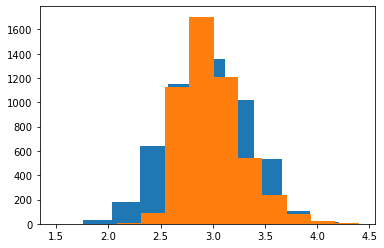

In [286]:
_ = plt.hist(np.log10(testy2["fwhm18"]))
_ = plt.hist(np.log10(testy2["dur_full"]))


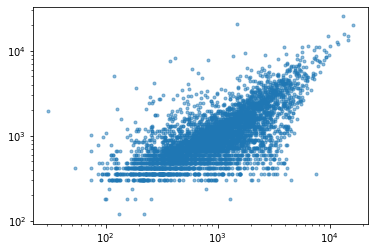

In [281]:
plt.loglog(testy2.fwhm18, testy2.dur_full, marker='.', ls='', alpha=0.5)

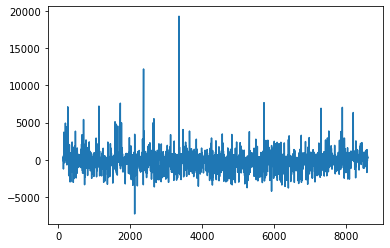

In [282]:
plt.plot(testy2.dur_full - testy2.fwhm18)